<a href="https://colab.research.google.com/github/dlwub/Final_Project_AIMS/blob/main/Final_Project_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

# Part II: Feature Engineering

In [ ]:
mergedData = pd.read_csv("/content/mergedData.csv")

### Describing the data

In [ ]:
dataset = mergedData.drop(['DATE'], axis=1)

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EXC,358.0,8.853010e+00,3.912466e+00,3.052000e+00,6.172000e+00,7.568500e+00,1.192413e+01,1.844800e+01
INT,358.0,8.780335e+00,3.495939e+00,3.450000e+00,6.097500e+00,7.445000e+00,1.088000e+01,2.162000e+01
PPI_IND,358.0,7.507817e+00,3.841669e+00,-5.029321e+00,5.412452e+00,7.307541e+00,9.828034e+00,1.821251e+01
PPI_MNG,358.0,7.250216e+01,3.557795e+01,2.381715e+01,4.048103e+01,6.572071e+01,9.988163e+01,1.616701e+02
GDP,358.0,9.026195e+05,1.959085e+05,5.709373e+05,7.085151e+05,9.615193e+05,1.098857e+06,1.160700e+06
RSV,358.0,6.787391e+10,2.119899e+10,3.632445e+10,4.617219e+10,6.851550e+10,8.453525e+10,1.295900e+11
Tr_bal,358.0,1.939775e+09,1.047523e+10,-3.667022e+10,-2.448825e+09,1.132588e+08,2.822664e+09,5.254918e+10
FGEXPND,358.0,3.266822e+03,1.500333e+03,1.522365e+03,1.916124e+03,3.017644e+03,3.996061e+03,8.829978e+03
UNEPLT,358.0,2.171180e+01,2.534963e+00,1.934200e+01,1.983600e+01,2.046400e+01,2.318000e+01,2.884000e+01
M3,358.0,1.777970e+12,1.331428e+12,1.957816e+11,4.830521e+11,1.650031e+12,2.841787e+12,4.673308e+12


### Correlation Matrix

In [ ]:
Corr_p = dataset.corr(method='pearson')

In [ ]:
Corr_p

,EXC,INT,PPI_IND,PPI_MNG,GDP,RSV,Tr_bal,FGEXPND,UNEPLT,M3,CPI
EXC,1.000000,-0.639699,0.207757,0.922615,0.821866,0.770073,0.446889,0.864145,0.806722,0.907533,0.930157
INT,-0.639699,1.000000,0.005071,-0.754002,-0.811047,-0.706719,-0.311062,-0.757084,-0.603603,-0.760784,-0.756556
PPI_IND,0.207757,0.005071,1.000000,0.191176,0.077678,0.118303,0.235892,0.223716,0.222682,0.183962,0.157589
PPI_MNG,0.922615,-0.754002,0.191176,1.000000,0.935553,0.877119,0.454617,0.940137,0.883443,0.995118,0.997400
GDP,0.821866,-0.811047,0.077678,0.935553,1.000000,0.900251,0.253367,0.850702,0.713089,0.936004,0.936092
RSV,0.770073,-0.706719,0.118303,0.877119,0.900251,1.000000,0.320904,0.799506,0.712511,0.885018,0.876399
Tr_bal,0.446889,-0.311062,0.235892,0.454617,0.253367,0.320904,1.000000,0.564682,0.629626,0.460331,0.457090
FGEXPND,0.864145,-0.757084,0.223716,0.940137,0.850702,0.799506,0.564682,1.000000,0.859327,0.953093,0.940621
UNEPLT,0.806722,-0.603603,0.222682,0.883443,0.713089,0.712511,0.629626,0.859327,1.000000,0.883740,0.881428
M3,0.907533,-0.760784,0.183962,0.995118,0.936004,0.885018,0.460331,0.953093,0.883740,1.000000,0.993645


In [ ]:
Corr_s = dataset.corr(method='spearman')

In [ ]:
Corr_s

,EXC,INT,PPI_IND,PPI_MNG,GDP,RSV,Tr_bal,FGEXPND,UNEPLT,M3,CPI
EXC,1.000000,-0.663979,0.173286,0.909228,0.887365,0.803983,0.258778,0.897865,0.655907,0.907731,0.910837
INT,-0.663979,1.000000,-0.025561,-0.814082,-0.785088,-0.742249,-0.140160,-0.819166,-0.603668,-0.821621,-0.817257
PPI_IND,0.173286,-0.025561,1.000000,0.124191,0.076426,0.116109,0.148432,0.119021,-0.001142,0.112721,0.110995
PPI_MNG,0.909228,-0.814082,0.124191,1.000000,0.984963,0.920716,0.216643,0.994224,0.693869,0.998995,0.998707
GDP,0.887365,-0.785088,0.076426,0.984963,1.000000,0.926311,0.183816,0.975944,0.681996,0.984264,0.983974
RSV,0.803983,-0.742249,0.116109,0.920716,0.926311,1.000000,0.176611,0.914342,0.626774,0.920699,0.919071
Tr_bal,0.258778,-0.140160,0.148432,0.216643,0.183816,0.176611,1.000000,0.245377,0.443947,0.222055,0.226272
FGEXPND,0.897865,-0.819166,0.119021,0.994224,0.975944,0.914342,0.245377,1.000000,0.701791,0.995585,0.995021
UNEPLT,0.655907,-0.603668,-0.001142,0.693869,0.681996,0.626774,0.443947,0.701791,1.000000,0.702651,0.704345
M3,0.907731,-0.821621,0.112721,0.998995,0.984264,0.920699,0.222055,0.995585,0.702651,1.000000,0.999206


### Heatmap of the correlation matrix

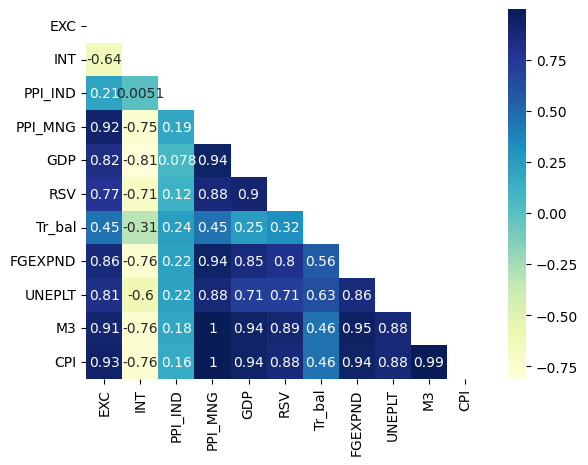

In [ ]:
# creating mask
mask = np.triu(np.ones_like(mergedData.corr(numeric_only=True)))

# plotting a triangle correlation heatmap
dataplot = sn.heatmap(mergedData.corr(numeric_only=True), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

###### As shown in the heat map of the correlation matrix, Interest rate has a strong negative correlation with CPI while PPI industrial and trade balance have weak positive correlations. All the other variables have strong positive correlation with CPI.

## PCA analysis on the original data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [ ]:
df = mergedData[['EXC', 'INT', 'PPI_IND', 'PPI_MNG', 'GDP', "RSV", 'Tr_bal',
 'FGEXPND', 'UNEPLT', 'M3', 'CPI']]

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df)
Scaled_data=scaler.transform(df)
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [ ]:
sum(principal.explained_variance_ratio_)

0.9338877568782569

In [ ]:
import numpy as np
nums = np.arange(10)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(Scaled_data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Explained variance ratio')

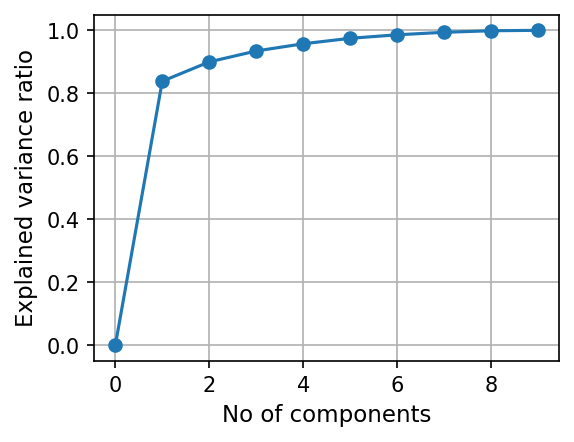

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('No of components', fontsize=11)
plt.ylabel('Explained variance ratio', fontsize=11)
#plt.title('No of components vs. Explained Variance Ratio\n', fontsize=10)

### 4 principal components explain close to 95% of the variability in the data.

#### Let's plot a scatter plot representation of the first 2 princpal components.

Text(0, 0.5, '$PC_{2}$')

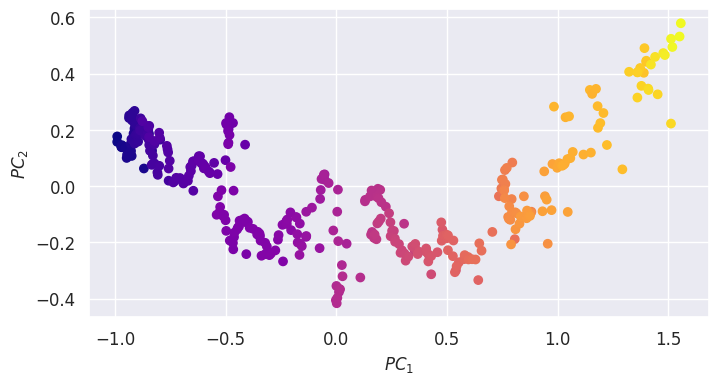

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(x[:,0], x[:,1], c=df['CPI'],cmap='plasma')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$PC_{1}$', fontsize=12)
plt.ylabel('$PC_{2}$', fontsize=12)

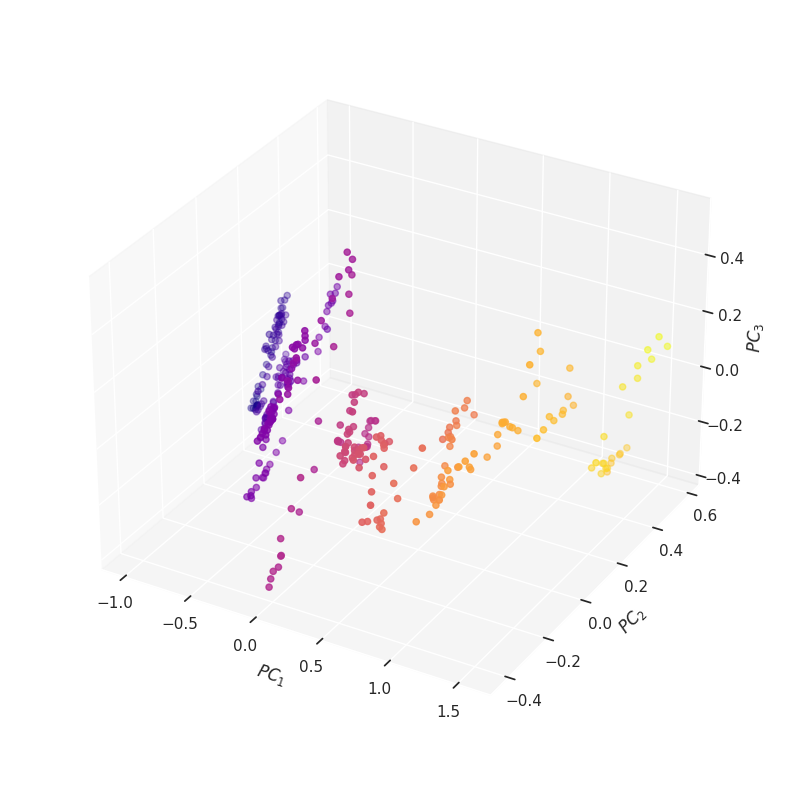

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:,0],x[:,1],x[:,2], c=df['CPI'],cmap='plasma')
axis.set_facecolor("white")
axis.set_xlabel("$PC_{1}$", fontsize=12)
axis.set_ylabel("$PC_{2}$", fontsize=12)
axis.set_zlabel("$PC_{3}$", fontsize=12)
axis.set_box_aspect(aspect=None, zoom=0.9)

# Loading Plots

### The features influencing the principal components most (presented in table)

In [ ]:
scaler=MinMaxScaler()

df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)

pca_features = pca.fit_transform(df_scaled)

loadings = pca.components_

n_features = pca.n_features_in_

feature_names = df.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
EXC,0.316581,0.165155
INT,-0.205600,0.295761
PPI_IND,0.039443,0.517346
PPI_MNG,0.348087,0.039705
GDP,0.425909,-0.462659
RSV,0.276561,-0.217660
Tr_bal,0.073643,0.330339
FGEXPND,0.263567,0.126209
UNEPLT,0.317999,0.477350


### The features influencing the principal components most (presented pictorialy)




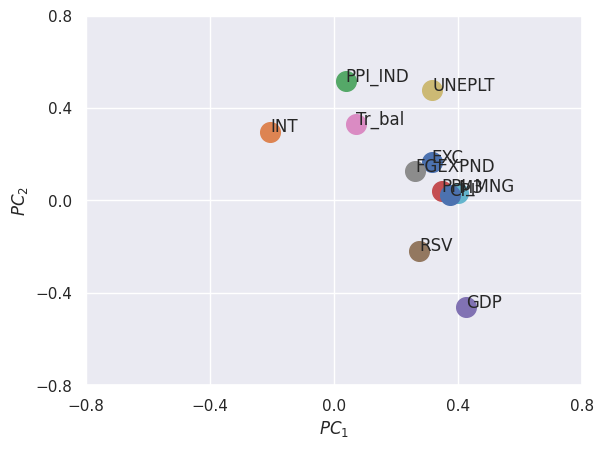

In [ ]:
sn.set()

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('$PC_{1}$', fontsize=12)
plt.ylabel('$PC_{2}$', fontsize=12)

# Show plot
#plt.title('2D Loading plot')
plt.show()

### The features influencing the principal components most (presented as vectors)

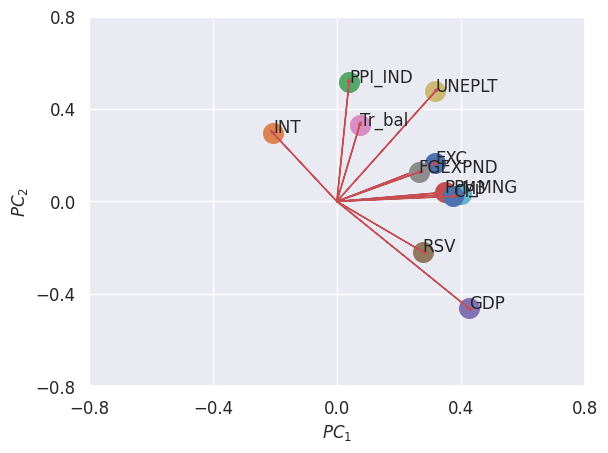

In [ ]:
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks, fontsize=12)
plt.yticks(yticks, fontsize=12)
plt.xlabel('$PC_{1}$', fontsize=12)
plt.ylabel('$PC_{2}$', fontsize=12)
# Show plot
#plt.title('2D Loading plot')
plt.show()